# Summary of DMM

This notebook contains a list of Python methods that were introduced in the DMM programming exercises.

### Import the libraries

In [1]:
import numpy as np  # import auxiliary library, typical idiom
import pandas as pd  # import the Pandas library, typical idiom

# next command ensures that plots appear inside the notebook
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns  # also improves the look of plots
sns.set()
plt.rcParams['figure.figsize'] = 10, 5  # default hor./vert. size of plots, in inches
plt.rcParams['lines.markeredgewidth'] = 1  # to fix issue with seaborn box plots; needed after import seaborn

In [2]:
from sklearn.linear_model import LinearRegression  # for linear regression
from sklearn.cluster import KMeans  # for clustering
from sklearn.tree import DecisionTreeClassifier  # for decision tree mining
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import train_test_split

import sys
sys.path.append('../')
from treeviz import tree_print  # to print decision tree

## Data sets

### Example data set

In [3]:
df_sk = pd.DataFrame([[0, 1], [1, 2], [2, 1], [3, 3], [4, 2], [5, 3], [4, 7],
                      [5, 8], [6, 7], [7, 9], [8, 8], [9, 9]],
                        columns=['a', 'b'])
df_sk.head()

,a,b
0,0,1
1,1,2
2,2,1
3,3,3
4,4,2


### Auto MPG data set

In [4]:
df_mpg = pd.read_csv('../datasets/auto-mpg.csv')
df_mpg_train, df_mpg_test = train_test_split(df_mpg, test_size=0.2, random_state=42)

# workaround for not knowing whether train_test_split returns copies or views
df_mpg_train = df_mpg_train.copy() 
df_mpg_test = df_mpg_test.copy()

df_mpg_train.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
3,16.0,8,304.0,150.0,3433.0,12.0,70,American,amc rebel sst
18,27.0,4,97.0,88.0,2130.0,14.5,70,Japanese,datsun pl510
376,37.0,4,91.0,68.0,2025.0,18.2,82,Japanese,mazda glc custom l
248,36.1,4,91.0,60.0,1800.0,16.4,78,Japanese,honda civic cvcc
177,23.0,4,115.0,95.0,2694.0,15.0,75,European,audi 100ls


### Wheat seeds data set


In [5]:
df_seeds = pd.read_csv('../datasets/seeds.csv')
df_seeds.head()

,area,perimeter,kernel_length,kernel_width,asymmetry,groove_length
0,15.26,14.84,5.763,3.312,2.221,5.220
1,14.88,14.57,5.554,3.333,1.018,4.956
2,14.29,14.09,5.291,3.337,2.699,4.825
3,13.84,13.94,5.324,3.379,2.259,4.805
4,16.14,14.99,5.658,3.562,1.355,5.175


# <span class="section" id="linear_regression_simple">1.</span> Linear Regression


### Step 1. Select the data


In [6]:
X_reg = df_sk[['a']].copy()  # independent/explanatory variable; just one column in this case
y_reg = df_sk[['b']].copy()  # dependent/response variable; just one column

### Step 2. Create the regression object


In [7]:
reg = LinearRegression()

### Step 3. Fit the model


In [8]:
reg.fit(X_reg, y_reg)

LinearRegression()

### Step 4.a. Extract model parameters


In [9]:
reg.coef_, reg.intercept_

(array([[1.01204819]]), array([0.44578313]))

### Step 4.b. Visualize the model


c:\Users\mail\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


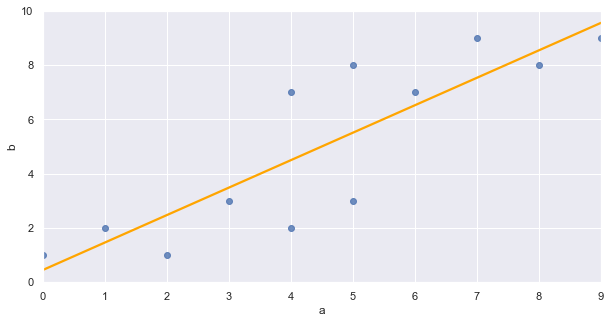

In [10]:
sns.regplot(X_reg['a'], y_reg['b'], line_kws={'color':'orange'}, ci=None);

### Step 4.c. Assess the model's quality


In [11]:
R2 = reg.score(X_reg, y_reg)
R2

0.7328624844204403

### Step 5. Make predictions


In [12]:
df_sk['predicted'] = reg.predict(X_reg)
df_sk

,a,b,predicted
0,0,1,0.445783
1,1,2,1.457831
2,2,1,2.469880
3,3,3,3.481928
4,4,2,4.493976
5,5,3,5.506024
6,4,7,4.493976
7,5,8,5.506024
8,6,7,6.518072
9,7,9,7.530120


In [13]:
reg.predict(pd.DataFrame([4.5]))

array([[5.]])

In [14]:
reg.predict(pd.DataFrame([4.5]))[0, 0]

5.0

# <span class="section">2.</span> Decision Tree Mining


### Step 1. Select the data


In [15]:
X_dtc = df_sk[['a', 'b']].copy()
y_dtc = X_dtc.index // 3  # create artificial target variable

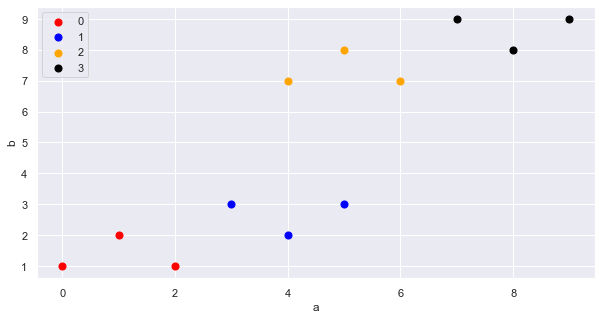

In [16]:
ax = X_dtc[y_dtc == 0].plot(kind='scatter', x='a', y='b', s=50, c="red")
X_dtc[y_dtc == 1].plot(kind='scatter', x='a', y='b', s=50, c="blue", ax=ax)
X_dtc[y_dtc == 2].plot(kind='scatter', x='a', y='b', s=50, c="orange", ax=ax)
X_dtc[y_dtc == 3].plot(kind='scatter', x='a', y='b', s=50, c="black", ax=ax)
ax.legend([0, 1, 2, 3])

### Step 2. Create the decision-tree classifier


In [17]:
dtc = DecisionTreeClassifier(max_depth=3)

### Step 3. Do the fitting


In [18]:
dtc.fit(X_dtc, y_dtc)

DecisionTreeClassifier(max_depth=3)

### Step 4.a. Extract model parameters


In [19]:
dtc.tree_.node_count, dtc.tree_.max_depth

(7, 2)

In [20]:
feature_importances = pd.DataFrame([dtc.feature_importances_], columns=X_dtc.columns)
feature_importances

,a,b
0,0.666667,0.333333


In [21]:
dtc.classes_

array([0, 1, 2, 3], dtype=int64)

### Step 4.b. Visualize the model


In [22]:
tree_print(dtc, X_dtc)

if b =< 5.0: 
  |then if a =< 2.5: 
  |  |then 0
  |  |else 1
  |else if a =< 6.5: 
  |  |then 2
  |  |else 3
<---->
Tree Depth:  2


### Step 4.c. Assess the model's quality


In [23]:
dtc.score(X_dtc, y_dtc)

1.0

### Step 5. Make predictions


In [24]:
X_dtc_test = [(1, 4), (2, 4), (4, 6), (5, 4), (7, 6), (8, 8)]

In [25]:
dtc.predict(X_dtc_test)

array([0, 0, 2, 1, 3, 3], dtype=int64)

# <span class="section">3.</span> Accuracy and Confusion Matrix


In [26]:
y_true = pd.Series([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3], name='actual')
y_pred = pd.Series([1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 3], name='predicted')
y_true.count()

20

In [27]:
accuracy_score(y_true, y_pred)  # fraction of correct predictions

0.6

In [28]:
cm = confusion_matrix(y_true, y_pred)  # cm[i, j] == number of values i predicted as j
cm

array([[8, 2, 0],
       [2, 3, 0],
       [4, 0, 1]], dtype=int64)

In [29]:
values = [1, 2, 3]
pd.DataFrame(cm, index=values, columns=["Predicted " + str(v) for v in values])

,Predicted 1,Predicted 2,Predicted 3
1,8,2,0
2,2,3,0
3,4,0,1


# <span class="section">4.</span> Clustering


### Step 1. Select the data


In [30]:
X_km = df_sk[['a', 'b']].copy()

### Step 2. Create the cluster object


In [31]:
km = KMeans(n_clusters=4)

### Step 3. Fit the model


In [32]:
km.fit(X_km)

KMeans(n_clusters=4)

### Step 4.a. Extract model parameters


In [33]:
centers = pd.DataFrame(km.cluster_centers_, columns=X_km.columns)
centers

,a,b
0,1.0,1.333333
1,8.0,8.666667
2,4.0,2.666667
3,5.0,7.333333


In [34]:
X_km['cluster'] = km.labels_
X_km

,a,b,cluster
0,0,1,0
1,1,2,0
2,2,1,0
3,3,3,2
4,4,2,2
5,5,3,2
6,4,7,3
7,5,8,3
8,6,7,3
9,7,9,1


### Step 4.b. Visualize the model


<AxesSubplot:xlabel='a', ylabel='b'>

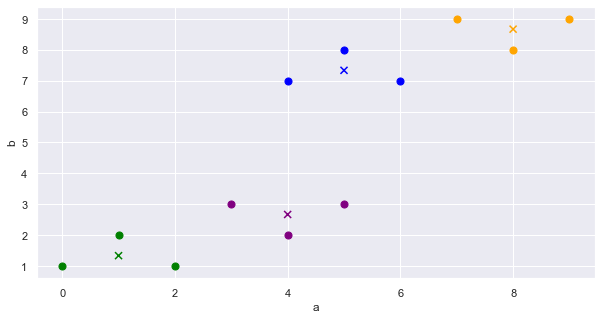

In [35]:
ax = X_km[X_km['cluster']==0].plot(kind='scatter', x='a', y='b', s=50, c='green')
X_km[X_km['cluster']==1].plot(kind='scatter',x='a',y='b',s=50, c='orange', ax = ax)
X_km[X_km['cluster']==2].plot(kind='scatter',x='a',y='b',s=50, c='purple', ax = ax)
X_km[X_km['cluster']==3].plot(kind='scatter',x='a',y='b',s=50, c='blue', ax = ax)

centers.plot(kind = 'scatter', x='a', y='b', c=['green','orange','purple','blue'], s=50, marker='x', ax=ax)

### Step 4.c. Assess the model's quality


In [36]:
inertia = km.inertia_
inertia

10.666666666666666

### Step 5. Do predictions


In [37]:
test_km = [(1, 4), (2, 4), (4, 6), (5, 4), (7, 6), (8, 8)]
km.predict(test_km)

array([0, 2, 3, 2, 3, 1])